In [6]:
!pip install opencv-python

     |████████████████████████████████| 53.9 MB 929 kB/s eta 0:00:01    |██▋                             | 4.4 MB 241 kB/s eta 0:03:25


In [2]:
!pip install pillow

In [14]:
!pip install tensorflow

In [1]:
#Importing the relevant libraries

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from PIL import Image
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Dropout, LayerNormalization
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img

In [2]:
import os
os.chdir('/Users/007yemmar/Library/CloudStorage/OneDrive-Personal/Adience')

In [3]:
#Reading the metadata files for each fold

In [4]:
fold_0=pd.read_table('/Users/007yemmar/Library/CloudStorage/OneDrive-Personal/Adience/fold_0_data.txt')
fold_0

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,"(25, 32)",f,0,414,1086,1383,-115,30,17
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,"(25, 32)",m,301,105,640,641,0,0,94
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,"(25, 32)",f,2395,876,771,771,175,-30,74
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,"(25, 32)",m,752,1255,484,485,180,0,47
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,"(25, 32)",m,175,80,769,768,-75,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...
4479,68094148@N04,11373794746_4720ac792a_o.jpg,478,"(25, 32)",m,664,0,242,211,-5,-15,73
4480,68094148@N04,11355711315_0f5b5da125_o.jpg,477,"(25, 32)",f,915,51,109,112,0,45,14
4481,10693681@N00,9162730346_b1bf71120a_o.jpg,479,"(25, 32)",m,2145,1270,249,249,10,30,25
4482,113830953@N04,11855529986_dff116e018_o.jpg,480,None,NaN,2878,1300,306,306,-100,0,164


In [5]:
fold_1=pd.read_table('/Users/007yemmar/Library/CloudStorage/OneDrive-Personal/Adience/fold_1_data.txt')
fold_1

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,114841417@N06,12068804204_085d553238_o.jpg,481,"(60, 100)",f,1141,780,975,976,0,0,118
1,114841417@N06,12068804204_085d553238_o.jpg,482,"(48, 53)",m,1821,283,969,969,-25,15,35
2,114841417@N06,12078357226_5fdd9367de_o.jpg,483,"(4, 6)",f,1788,341,306,306,-10,0,168
3,114841417@N06,12019067874_0e988248af_o.jpg,483,"(4, 6)",f,3,183,932,777,-115,0,27
4,114841417@N06,12077009614_2490487d2a_o.jpg,484,45,f,258,133,1734,1734,15,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...
3725,35953373@N04,9496952502_4e87cc8b60_o.jpg,907,"(15, 20)",m,1318,184,643,644,5,-30,78
3726,104937236@N08,11852401355_e54eba57b6_o.jpg,908,"(27, 32)",f,1310,725,573,573,-90,0,90
3727,37404707@N08,11128849885_6a56d25762_o.jpg,909,"(8, 12)",NaN,820,1099,364,364,-5,0,103
3728,37404707@N08,11182710183_e75c82dde1_o.jpg,910,"(60, 100)",NaN,1080,661,376,376,-5,0,61


In [6]:
fold_2=pd.read_table('/Users/007yemmar/Library/CloudStorage/OneDrive-Personal/Adience/fold_2_data.txt')
fold_2

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,64504106@N06,11831304783_488d6c3a6d_o.jpg,911,"(0, 2)",m,438,914,605,606,-90,0,123
1,64504106@N06,11849646776_35253e988f_o.jpg,911,"(0, 2)",m,19,712,1944,1736,-105,0,86
2,64504106@N06,11848166326_57b03f535e_o.jpg,911,"(0, 2)",m,382,680,1785,1768,-80,0,14
3,64504106@N06,11812546385_bb4d020dde_o.jpg,911,"(0, 2)",m,608,948,893,892,-105,0,8
4,64504106@N06,11831118625_81dcc72e75_o.jpg,912,"(38, 43)",m,23,150,508,508,-90,0,79
...,...,...,...,...,...,...,...,...,...,...,...,...
3889,19393853@N00,10701729133_9b74be645f_o.jpg,1317,None,NaN,2288,725,255,255,0,15,32
3890,19393853@N00,9767778096_b9ff679fb8_o.jpg,1317,None,NaN,508,337,1581,1581,-90,30,39
3891,19393853@N00,9709082628_9f1075d8ae_o.jpg,1317,None,NaN,326,93,954,867,-115,0,64
3892,19393853@N00,9767518631_71261193e8_o.jpg,1317,None,NaN,1246,353,994,995,-105,30,149


In [7]:
fold_3=pd.read_table('/Users/007yemmar/Library/CloudStorage/OneDrive-Personal/Adience/fold_3_data.txt')
fold_3

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,113445054@N07,11763777465_11d01c34ce_o.jpg,1322,"(25, 32)",m,1102,296,357,357,-15,0,59
1,113445054@N07,11763777465_11d01c34ce_o.jpg,1323,"(25, 32)",f,1713,580,325,325,-5,0,118
2,113445054@N07,11763777465_11d01c34ce_o.jpg,1324,"(15, 20)",f,1437,664,306,306,5,0,109
3,113445054@N07,11764005785_f21921aea6_o.jpg,1325,"(25, 32)",f,978,229,803,803,-20,-45,16
4,113445054@N07,11763728674_a41d99f71e_o.jpg,1326,"(25, 32)",m,1745,910,242,242,-10,0,55
...,...,...,...,...,...,...,...,...,...,...,...,...
3441,113728563@N05,11827967936_b29e8e87eb_o.jpg,1739,None,NaN,0,0,768,921,0,0,78
3442,113728563@N05,11826123976_c7d6738478_o.jpg,1742,None,NaN,450,906,932,932,0,0,127
3443,113728563@N05,11827955196_c97e4f877d_o.jpg,1743,None,NaN,72,142,560,560,20,0,13
3444,113728563@N05,11826168836_69124b9bdf_o.jpg,1741,None,NaN,0,1284,921,1160,-105,-30,74


In [8]:
fold_4=pd.read_table('/Users/007yemmar/Library/CloudStorage/OneDrive-Personal/Adience/fold_4_data.txt')
fold_4

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,115321157@N03,12111738395_a7f715aa4e_o.jpg,1744,"(4, 6)",m,663,997,637,638,-95,0,129
1,115321157@N03,12112413505_0aea8e17c6_o.jpg,1745,"(48, 53)",m,505,846,433,433,-95,0,72
2,115321157@N03,12112392255_995532c2f0_o.jpg,1744,"(4, 6)",m,517,1185,383,383,0,0,70
3,115321157@N03,12112392255_995532c2f0_o.jpg,1746,"(25, 32)",m,2247,688,376,376,0,30,67
4,115321157@N03,12112392255_995532c2f0_o.jpg,1747,"(25, 32)",m,1421,667,325,325,0,0,102
...,...,...,...,...,...,...,...,...,...,...,...,...
3811,7153718@N04,11598838386_349a0d4849_o.jpg,2282,None,NaN,596,460,1472,1473,-75,0,30
3812,7153718@N04,11598166203_c70bb34c80_o.jpg,2283,None,NaN,1179,755,331,331,5,0,108
3813,7153718@N04,11598166203_c70bb34c80_o.jpg,2282,None,NaN,1201,1179,293,293,5,0,99
3814,7153718@N04,11598145163_733cb99713_o.jpg,2282,None,NaN,1027,946,408,408,-85,0,49


In [9]:
total_data = pd.concat([fold_0, fold_1, fold_2, fold_3, fold_4], ignore_index=True)
print(total_data.shape)

(19370, 12)


In [10]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19370 entries, 0 to 19369
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             19370 non-null  object
 1   original_image      19370 non-null  object
 2   face_id             19370 non-null  int64 
 3   age                 19370 non-null  object
 4   gender              18591 non-null  object
 5   x                   19370 non-null  int64 
 6   y                   19370 non-null  int64 
 7   dx                  19370 non-null  int64 
 8   dy                  19370 non-null  int64 
 9   tilt_ang            19370 non-null  int64 
 10  fiducial_yaw_angle  19370 non-null  int64 
 11  fiducial_score      19370 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.8+ MB


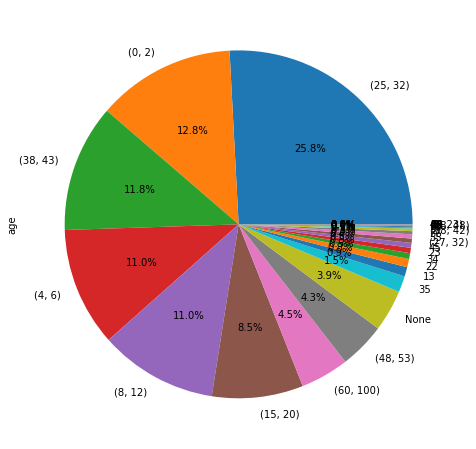

In [11]:
#Pie chart of the age distribution

plt.figure(1, figsize=(8,8))
total_data.age.value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

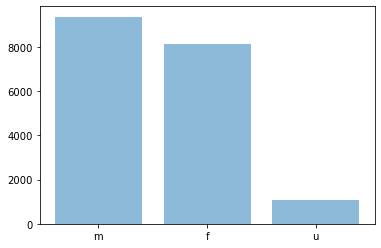

In [15]:
#Bar graph of the Gender Distribution
gender = ['m', 'f', 'u']
plt.bar(gender, total_data.gender.value_counts(), align='center', alpha=0.5)
plt.show()

In [16]:
#Picking out the relevant columns for our predictions

df = total_data[['age', 'gender', 'x', 'y', 'dx', 'dy']].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19370 entries, 0 to 19369
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     19370 non-null  object
 1   gender  18591 non-null  object
 2   x       19370 non-null  int64 
 3   y       19370 non-null  int64 
 4   dx      19370 non-null  int64 
 5   dy      19370 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 908.1+ KB


In [17]:
# Adding Path of each Image
img_path = []
for row in total_data.iterrows():
    path = "/Users/007yemmar/Library/CloudStorage/OneDrive-Personal/Adience/aligned/"+row[1].user_id+"/landmark_aligned_face."+str(row[1].face_id)+"."+row[1].original_image
    img_path.append(path)
df['img_path'] = img_path

In [18]:
df.head()

,age,gender,x,y,dx,dy,img_path
0,"(25, 32)",f,0,414,1086,1383,/Users/007yemmar/Library/CloudStorage/OneDrive...
1,"(25, 32)",m,301,105,640,641,/Users/007yemmar/Library/CloudStorage/OneDrive...
2,"(25, 32)",f,2395,876,771,771,/Users/007yemmar/Library/CloudStorage/OneDrive...
3,"(25, 32)",m,752,1255,484,485,/Users/007yemmar/Library/CloudStorage/OneDrive...
4,"(25, 32)",m,175,80,769,768,/Users/007yemmar/Library/CloudStorage/OneDrive...


In [19]:
df.age.unique()

array(['(25, 32)', '(38, 43)', '(4, 6)', '(60, 100)', '(15, 20)',
       '(48, 53)', '(8, 12)', '(0, 2)', 'None', '(38, 48)', '35', '3',
       '55', '58', '22', '13', '45', '36', '23', '(38, 42)', '(8, 23)',
       '(27, 32)', '57', '56', '2', '29', '34', '42', '46', '32'],
      dtype=object)

In [20]:
# Mapping Ages to bring All the Ages into there respective Range
age_mapping = [('(0, 2)', '0-2'), ('2', '0-2'), ('3', '0-2'), ('(4, 6)', '4-6'), ('(8, 12)', '8-13'), ('13', '8-13'), ('22', '15-20'), ('(8, 23)','15-20'), ('23', '25-32'), ('(15, 20)', '15-20'), ('(25, 32)', '25-32'), ('(27, 32)', '25-32'), ('32', '25-32'), ('34', '25-32'), ('29', '25-32'), ('(38, 42)', '38-43'), ('35', '38-43'), ('36', '38-43'), ('42', '48-53'), ('45', '38-43'), ('(38, 43)', '38-43'), ('(38, 42)', '38-43'), ('(38, 48)', '48-53'), ('46', '48-53'), ('(48, 53)', '48-53'), ('55', '48-53'), ('56', '48-53'), ('(60, 100)', '60+'), ('57', '60+'), ('58', '60+')]
age_mapping_dict = {each[0]: each[1] for each in age_mapping}
drop_labels = []
for idx, each in enumerate(df.age):
    if each == 'None':
        drop_labels.append(idx)
    else:
        df.age.loc[idx] = age_mapping_dict[each]
df = df.drop(labels=drop_labels, axis=0) #droped None values
df.age.value_counts(dropna=False)

/Users/007yemmar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


25-32    5296
38-43    2776
0-2      2509
8-13     2292
4-6      2140
15-20    1792
48-53     916
60+       901
Name: age, dtype: int64

In [21]:
# Dropping Null Values
df = df.dropna()
unbiased_data = df[df.gender != 'u'].copy()
unbiased_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17452 entries, 0 to 19345
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       17452 non-null  object
 1   gender    17452 non-null  object
 2   x         17452 non-null  int64 
 3   y         17452 non-null  int64 
 4   dx        17452 non-null  int64 
 5   dy        17452 non-null  int64 
 6   img_path  17452 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.1+ MB


In [22]:
gender_to_label_map = {
    'f' : 0,
    'm' : 1
}

age_to_label_map = {
    '0-2'  :0,
    '4-6'  :1,
    '8-13' :2,
    '15-20':3,
    '25-32':4,
    '38-43':5,
    '48-53':6,
    '60+'  :7
}

unbiased_data['age'] = unbiased_data['age'].apply(lambda age: age_to_label_map[age])
unbiased_data['gender'] = unbiased_data['gender'].apply(lambda g: gender_to_label_map[g])
unbiased_data.head()

,age,gender,x,y,dx,dy,img_path
0,4,0,0,414,1086,1383,/Users/007yemmar/Library/CloudStorage/OneDrive...
1,4,1,301,105,640,641,/Users/007yemmar/Library/CloudStorage/OneDrive...
2,4,0,2395,876,771,771,/Users/007yemmar/Library/CloudStorage/OneDrive...
3,4,1,752,1255,484,485,/Users/007yemmar/Library/CloudStorage/OneDrive...
4,4,1,175,80,769,768,/Users/007yemmar/Library/CloudStorage/OneDrive...


In [23]:
# Unique Ages

unbiased_data.age.unique()

array([4, 5, 1, 7, 3, 6, 2, 0])

In [24]:
unbiased_data.gender.value_counts()

0    9332
1    8120
Name: gender, dtype: int64

In [25]:
unbiased_data.age.value_counts()

4    5240
5    2776
2    2285
1    2139
3    1790
0    1418
6     909
7     895
Name: age, dtype: int64